In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("nearest_neighbors/benchmarks_results.csv")

In [3]:
cols = ["n_samples_train", "n_samples_test", "n_features", "chunk_size"]
df[cols] = df[cols].astype(np.uint32)

In [4]:
df_grouped = df.groupby(["n_samples_train", "n_samples_test", "n_features"])

In [5]:
y_labels = {
    "time_elapsed": "time elapsed in s",
    "throughput": "thoughput in GB/s"
}

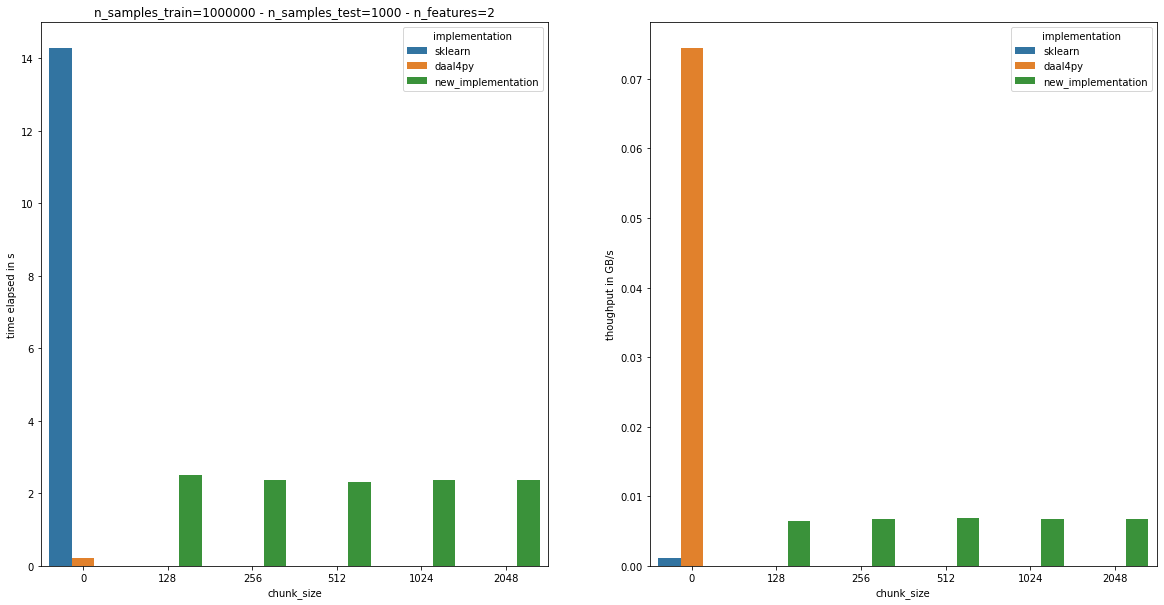

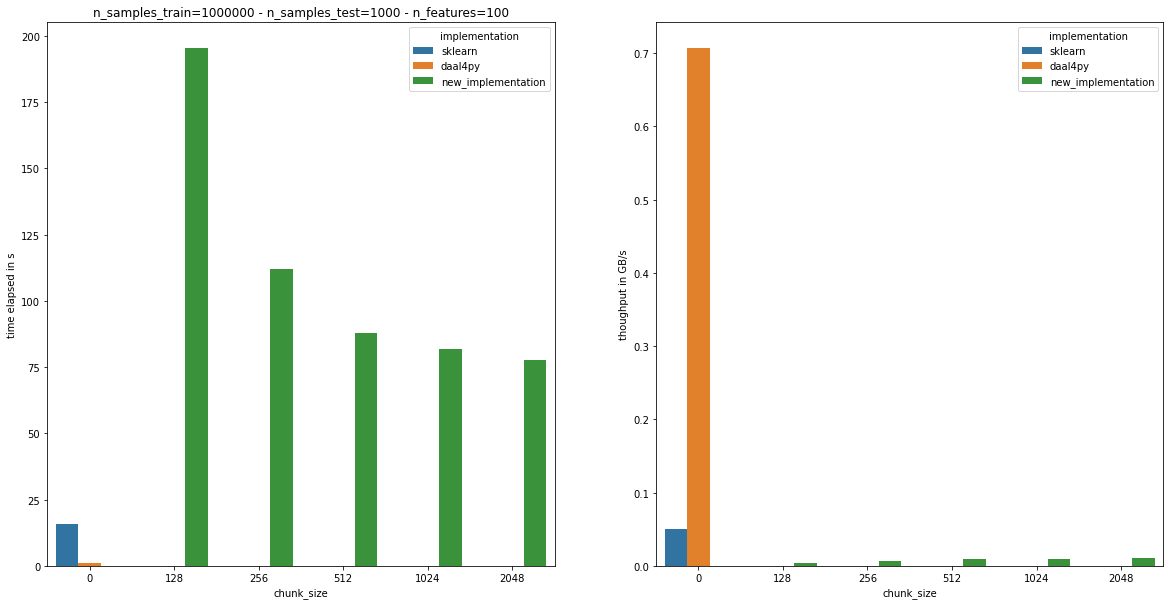

In [6]:
for vals, df in df_grouped:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    axes = axes.flatten()
    for col, ax in zip(["time_elapsed", "throughput"], axes):
        sns.barplot(x="chunk_size", y=col, hue="implementation", data=df, ax=ax)
        ax.set_ylabel(y_labels[col])
    title = "n_samples_train=%s - n_samples_test=%s - n_features=%s" % vals
    axes[0].set_title(title)